<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd


Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [2]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [3]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [4]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [5]:
df = pd.read_csv(file_name)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [ ]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [15]:
await pyodide.loadPackage("micropip");
# Load Pyodide
let pyodide = await loadPyodide({ indexURL : "https://cdn.jsdelivr.net/pyodide/v0.25.1/full/" });

# Load micropip
await pyodide.loadPackage("micropip");

# Install scipy using micropip
await pyodide.runPythonAsync(`
    import micropip
    micropip.install('scipy')
`);

await micropip.install('scipy');

import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'ConvertedComp' is the column of interest
df['ConvertedComp'].plot(kind='kde')

# Add labels and title for clarity
plt.xlabel('Converted Annual Compensation (USD)')
plt.ylabel('Density')
plt.title('Distribution of Converted Annual Compensation')

# Display the plot
plt.show()


<class 'SyntaxError'>: invalid syntax (<ipython-input-15-1b45c47dc902>, line 3)

Plot the histogram for the column `ConvertedComp`.


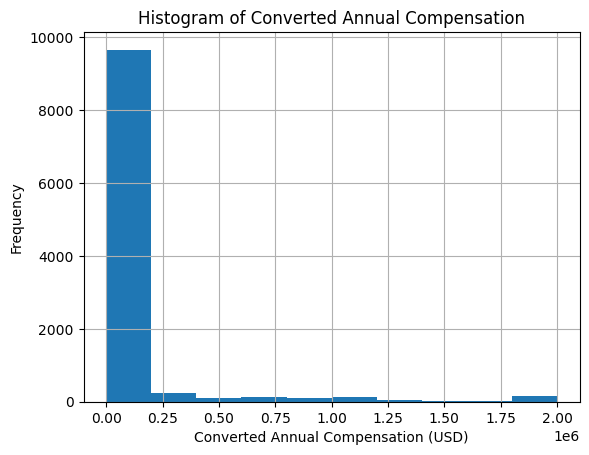

In [16]:
# your code goes here
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'ConvertedComp' is the column of interest
df['ConvertedComp'].hist()

# Add labels and title for clarity
plt.xlabel('Converted Annual Compensation (USD)')
plt.ylabel('Frequency')
plt.title('Histogram of Converted Annual Compensation')

# Display the plot
plt.show()


What is the median of the column `ConvertedComp`?


In [17]:
# your code goes here
# Calculate the median of the 'ConvertedComp' column
median_value = df['ConvertedComp'].median()

print("Median of ConvertedComp:", median_value)


Median of ConvertedComp: 57745.0


How many responders identified themselves only as a **Man**?


In [19]:
# your code goes here
# Count the occurrences of 'Man' in the 'gender' column
man_count = df['Gender'].value_counts()['Man']

print("Number of responders identified as Man:", man_count)


Number of responders identified as Man: 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [21]:
# your code goes here
# Filter the DataFrame to include only rows where gender is 'Woman'
women_df = df[df['Gender'] == 'Woman']

# Calculate the median of the 'ConvertedComp' column for women
median_converted_comp_women = women_df['ConvertedComp'].median()

print("Median ConvertedComp of responders identified as Woman:", median_converted_comp_women)


Median ConvertedComp of responders identified as Woman: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [22]:
# your code goes here
# Assuming df is your DataFrame and 'Age' is the column of interest
five_number_summary = df['Age'].describe().loc[['min', '25%', '50%', '75%', 'max']]

print(five_number_summary)


min    16.0
25%    25.0
50%    29.0
75%    35.0
max    99.0
Name: Age, dtype: float64


Plot a histogram of the column `Age`.


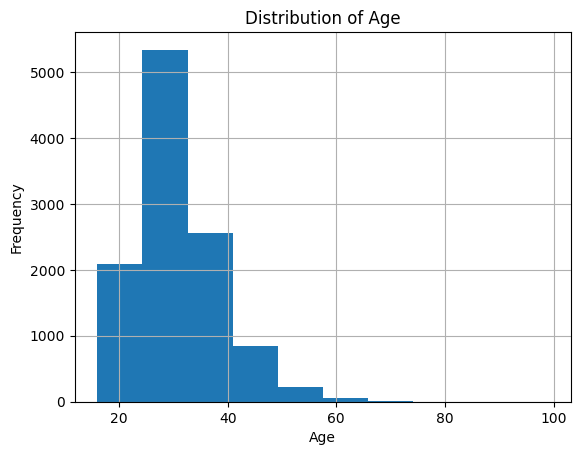

In [23]:
# your code goes here
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'Age' is the column of interest
df['Age'].hist()

# Add labels and title for clarity
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')

# Display the plot
plt.show()


## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


In [24]:
# your code goes here
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'ConvertedComp' is the column of interest
sns.boxplot(x=df['ConvertedComp'])

# Add labels and title for clarity
plt.xlabel('Converted Compensation')
plt.title('Box Plot of Converted Compensation')

# Display the plot
plt.show()


<class 'ModuleNotFoundError'>: No module named 'seaborn'

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [25]:
# your code goes here
# Calculating the IQR of the 'ConvertedComp' column
quartiles = df['ConvertedComp'].quantile([0.25, 0.75])
iqr = quartiles[0.75] - quartiles[0.25]

print("Inter Quartile Range for ConvertedComp:", iqr)


Inter Quartile Range for ConvertedComp: 73132.0


Find out the upper and lower bounds.


In [26]:
# your code goes here
# Calculate the quartiles and IQR for the 'ConvertedComp' column
quartiles = df['ConvertedComp'].quantile([0.25, 0.75])
iqr = quartiles[0.75] - quartiles[0.25]

# Define the value for which you want to find the upper and lower bounds
value = 27.33

# Calculate the upper and lower bounds
lower_bound = quartiles[0.25] - 1.5 * iqr
upper_bound = quartiles[0.75] + 1.5 * iqr

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)


Lower Bound: -82830.0
Upper Bound: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [27]:
# your code goes here
# Calculate the quartiles and IQR for the 'ConvertedComp' column
quartiles = df['ConvertedComp'].quantile([0.25, 0.75])
iqr = quartiles[0.75] - quartiles[0.25]

# Define the upper and lower bounds for outliers
lower_bound = quartiles[0.25] - 1.5 * iqr
upper_bound = quartiles[0.75] + 1.5 * iqr

# Count the number of outliers
outliers_below = df['ConvertedComp'].lt(lower_bound).sum()
outliers_above = df['ConvertedComp'].gt(upper_bound).sum()

print("Outliers below the lower bound:", outliers_below)
print("Outliers above the upper bound:", outliers_above)
print("Total outliers:", outliers_below + outliers_above)


Outliers below the lower bound: 0
Outliers above the upper bound: 879
Total outliers: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [28]:
# your code goes here
# Calculate the quartiles and IQR for the 'ConvertedComp' column
quartiles = df['ConvertedComp'].quantile([0.25, 0.75])
iqr = quartiles[0.75] - quartiles[0.25]

# Define the upper and lower bounds for outliers
lower_bound = quartiles[0.25] - 1.5 * iqr
upper_bound = quartiles[0.75] + 1.5 * iqr

# Create a new DataFrame without outliers
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [29]:
# your code goes here
# Assuming df is your DataFrame
correlation_matrix = df.corr()

# Extract the correlation of 'Age' with all other columns
age_correlation = correlation_matrix['Age']

print(age_correlation)


<ipython-input-29-52e07db6e081>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
